In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from scipy.signal import find_peaks, convolve
import sys
import os
import re
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, parent_dir)
import matplotlibcolors
plt.style.use(parent_dir + '/matplotlibrc')

%matplotlib widget

In [2]:
files = glob('./*.npy')

26


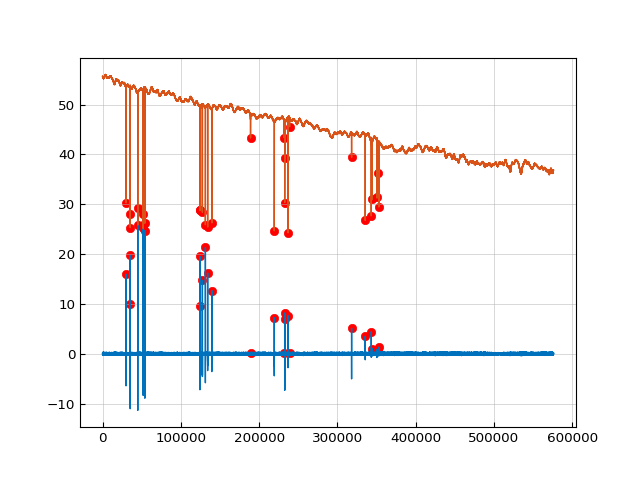

In [3]:
freqs2, s212 = np.load(files[0])
fig, ax = plt.subplots()
diff2 = np.diff(s212, 2)
mph = .45
mpp = mph
locs2, props2 = find_peaks(diff2, height=mph, prominence=mpp)
locs2 = np.append(locs2, [189069, 231872, 238989])
print(len(locs2))
ax.plot(diff2)
ax.plot(s212[1:-1])
ax.scatter(locs2, diff2[locs2], color='red', label='peaks')
ax.scatter(locs2, s212[1:-1][locs2], color='red', label='peaks')
# 

26


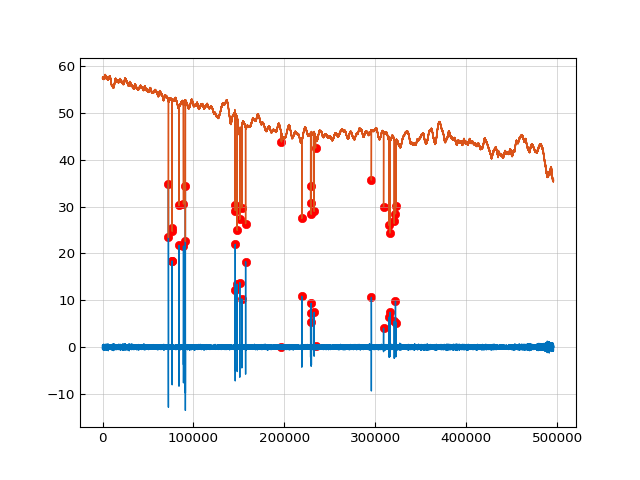

In [5]:
freqs, s21 = np.load(files[1])
fig, ax = plt.subplots()
diff2 = np.diff(s21, 2)
mph = 1
mpp = mph
locs, props = find_peaks(diff2, height=mph, prominence=mpp)
locs = locs[:-6]
locs = np.append(locs, [196855, 234365])
print(len(locs))

ax.plot(diff2)
ax.plot(s21[1:-1])
ax.scatter(locs, diff2[locs], color='red', label='peaks')
ax.scatter(locs, s21[1:-1][locs], color='red', label='peaks')

In [6]:
f0s = np.sort(freqs[locs])
f0s2 = np.sort(freqs2[locs2])

0.00021541276773406065


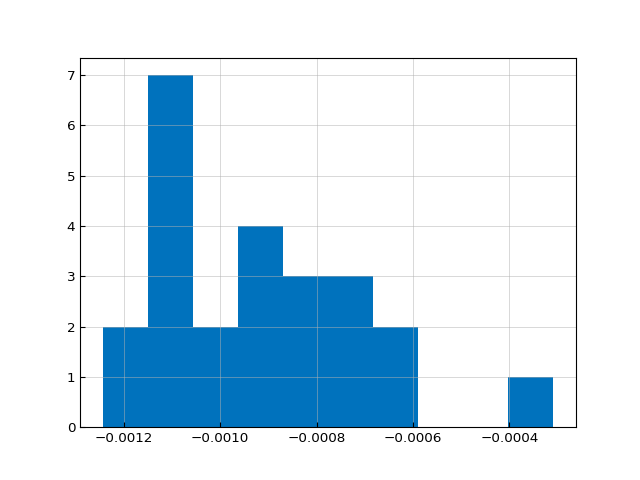

In [16]:
fig, ax = plt.subplots()
scatter = (f0s-f0s2)/f0s2
print(np.std(scatter[(scatter<0.001)&(scatter>-0.002)]))
_ =ax.hist(scatter[(scatter<0.001)&(scatter>-0.002)], bins=10)